Dataset from https://www.kaggle.com/paultimothymooney/kermany2018

In [1]:
import keras
import os
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tqdm import tqdm
from glob import glob
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as k
from keras.optimizers import Adam
from keras.regularizers import l2
from skimage.transform import resize as stresize
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
print(os.listdir("OCT2017/train"))

['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [3]:
normal_len = len(os.listdir("OCT2017/train/NORMAL"))
drusen_len = len(os.listdir("OCT2017/train/DRUSEN"))
cnv_len = len(os.listdir("OCT2017/train/CNV"))
dme_len = len(os.listdir("OCT2017/train/DME"))
print("No. of normal images = ",normal_len)
print("No. of images with Drusen Disease = ",drusen_len)
print("No. of images with CNV Disease = ",cnv_len)
print("No. of images with DME Disease = ",dme_len)

No. of normal images =  26315
No. of images with Drusen Disease =  8616
No. of images with CNV Disease =  37205
No. of images with DME Disease =  11348


Different Shapes of Images

In [4]:
normal_images = os.listdir("OCT2017/train/NORMAL/")
size = []
for i in range(len(normal_images)):
    img = cv2.imread("OCT2017/train/NORMAL/"+normal_images[i])
    size.append(img.shape)
print("The different sizes of Normal images are = ",set(size))

The different sizes of Normal images are =  {(496, 768, 3), (496, 1024, 3), (496, 512, 3), (496, 1536, 3), (496, 384, 3), (512, 512, 3)}


In [5]:
drusen_images = os.listdir("OCT2017/train/DRUSEN/")
size = []
for i in range(len(drusen_images)):
    img = cv2.imread("OCT2017/train/DRUSEN/"+drusen_images[i])
    size.append(img.shape)
print("The different sizes of DRUSEN images are = ",set(size))

The different sizes of DRUSEN images are =  {(496, 1024, 3), (496, 1536, 3), (496, 512, 3), (496, 768, 3)}


In [6]:
cnv_images = os.listdir("OCT2017/train/CNV/")
size = []
for i in range(len(cnv_images)):
    img = cv2.imread("OCT2017/train/CNV/"+cnv_images[i])
    size.append(img.shape)
print("The different sizes of CNV images are = ",set(size))

The different sizes of CNV images are =  {(496, 1024, 3), (496, 384, 3), (496, 1536, 3), (496, 512, 3), (496, 768, 3)}


In [7]:
dme_images = os.listdir("OCT2017/train/DME/")
size = []
for i in range(len(dme_images)):
    img = cv2.imread("OCT2017/train/DME/"+dme_images[i])
    size.append(img.shape)
print("The different sizes of DME images are = ",set(size))

The different sizes of DME images are =  {(496, 768, 3), (496, 1024, 3), (496, 512, 3), (496, 1536, 3), (512, 512, 3)}


Normal


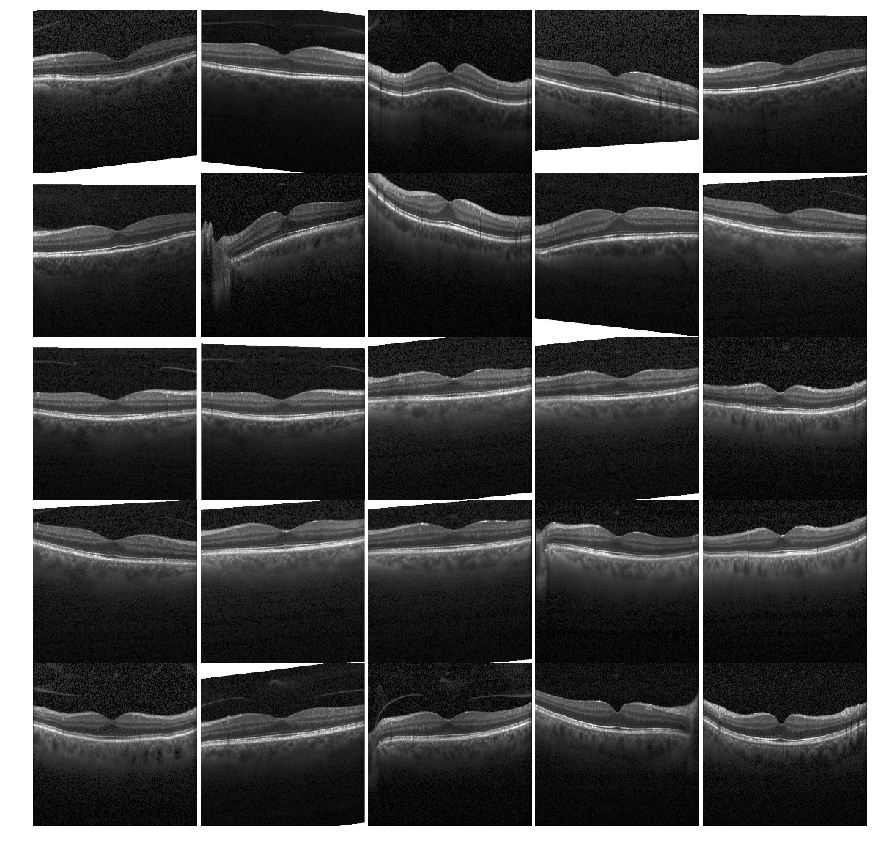

In [8]:
print("Normal")
imgs = glob('OCT2017/train/NORMAL/**')
i = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in imgs[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224,224)) 
    plt.subplot(5, 5, i+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.axis('off');
    i += 1

Drusen


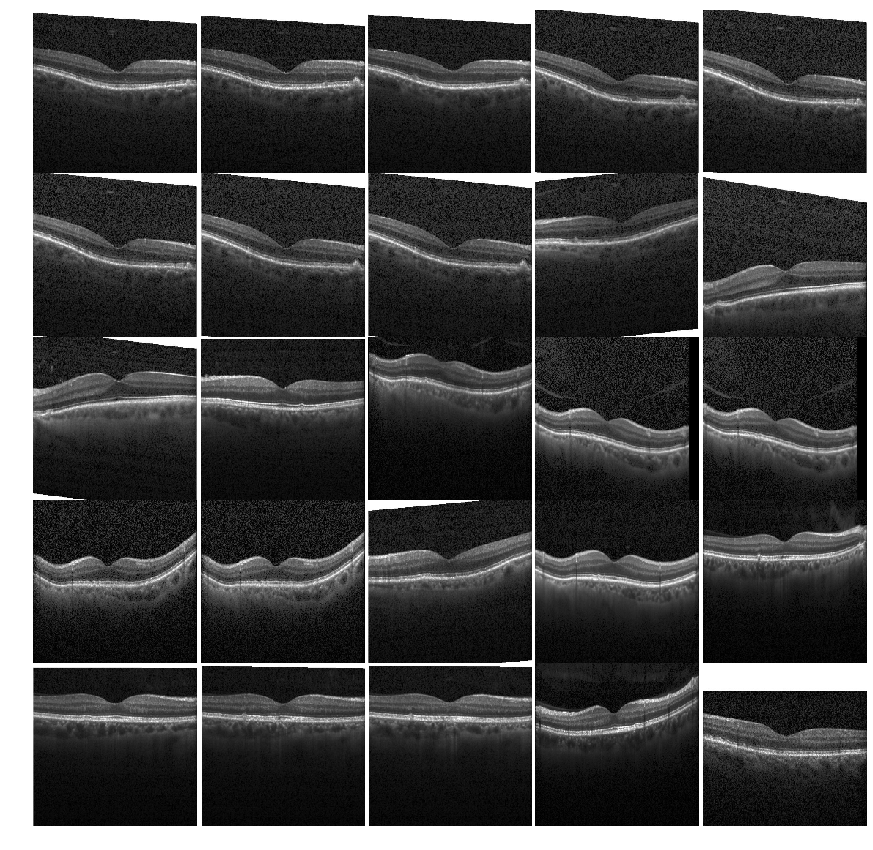

In [9]:
print("Drusen")
imgs = glob('OCT2017/train/DRUSEN/**')
i = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in imgs[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224, 224)) 
    plt.subplot(5, 5, i+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.axis('off');
    i += 1

CNV


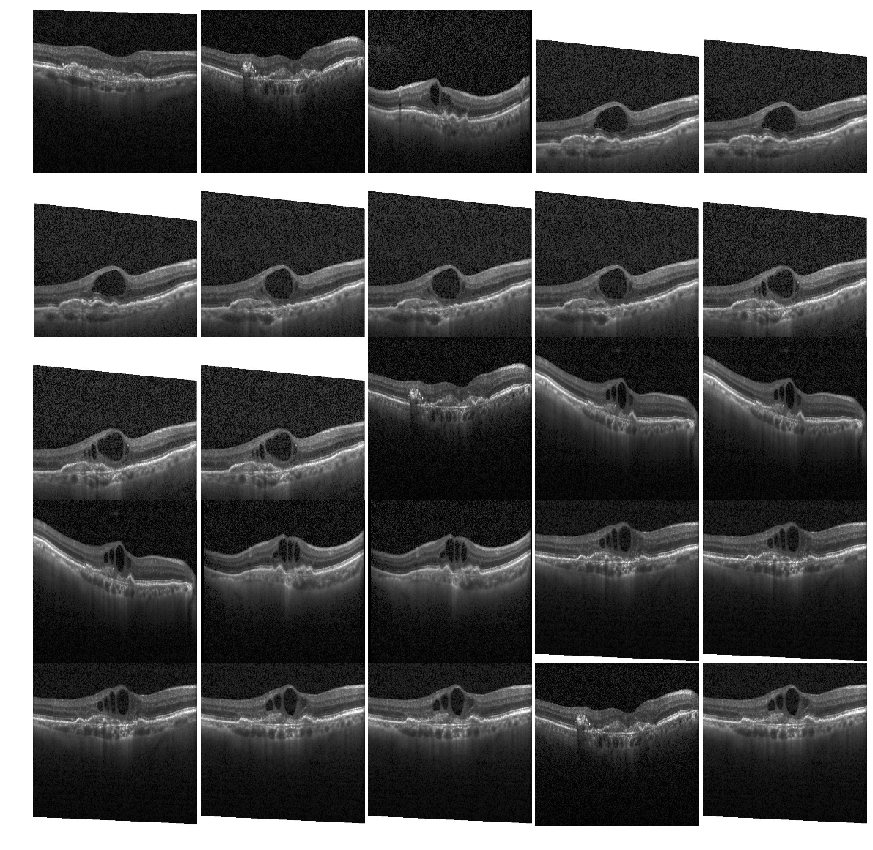

In [10]:
print("CNV")
imgs = glob('OCT2017/train/CNV/**')
i = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in imgs[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224,224)) 
    plt.subplot(5, 5, i+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.axis('off');
    i += 1

DME


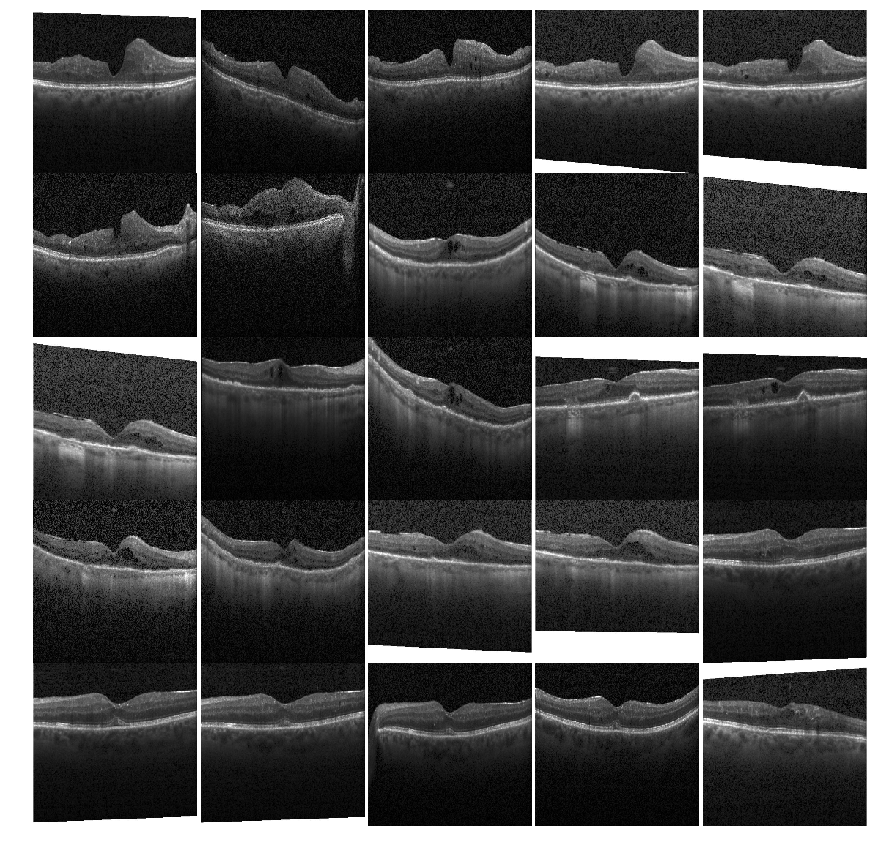

In [11]:
print("DME")
imgs = glob('OCT2017/train/DME/**')
i = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in imgs[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224,224)) 
    plt.subplot(5, 5, i+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.axis('off');
    i += 1

In [12]:
labels = os.listdir('OCT2017/train/')
train_datagen = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=25, 
                              zoom_range=0.15,
                              validation_split=0.2)

In [13]:
IMG_SIZE = 224
batch_size = 32
train_data_dir = 'OCT2017/train/'
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=32,
    subset='training',
    class_mode='categorical')
valid_X, valid_Y = next(train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=6000,
    subset='validation',
    class_mode='categorical'))

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.


In [14]:
def get_label(Dir):
    for folderName in os.listdir(Dir):
        if not folderName.startswith('.'):
            if folderName in ['NORMAL']:
                label = 0
            elif folderName in ['DRUSEN']:
                label = 1
            elif folderName in ['CNV']:
                label = 2
            elif folderName in ['DME']:
                label = 3
            else:
                label = 4
    return folderName, label

In [15]:
def preprocessing_data(Dir):
    X = []
    y = []
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = stresize(img, (IMG_SIZE,IMG_SIZE , 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
    X = X.values
    y = y.values
    
    return X,y

In [16]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('valid_X', 3612672144),
 ('img', 786560),
 ('cnv_images', 321104),
 ('normal_images', 225408),
 ('im', 150656),
 ('dme_images', 98624),
 ('size', 98624),
 ('valid_Y', 96112),
 ('imgs', 93544),
 ('drusen_images', 69160),
 ('ImageDataGenerator', 2000),
 ('Adam', 1056),
 ('BatchNormalization', 1056),
 ('Conv2D', 1056),
 ('Dense', 1056),
 ('Dropout', 1056),
 ('Flatten', 1056),
 ('MaxPooling2D', 1056),
 ('Sequential', 1056),
 ('get_label', 136),
 ('l2', 136),
 ('preprocessing_data', 136),
 ('stresize', 136),
 ('to_categorical', 136),
 ('train_test_split', 136),
 ('labels', 96),
 ('train_data_dir', 93),
 ('l', 85),
 ('k', 80),
 ('np', 80),
 ('plt', 80),
 ('train_datagen', 56),
 ('train_generator', 56),
 ('IMG_SIZE', 28),
 ('batch_size', 28),
 ('cnv_len', 28),
 ('dme_len', 28),
 ('drusen_len', 28),
 ('i', 28),
 ('normal_len', 28)]

In [17]:
import gc
del valid_X
del img
del cnv_images
del normal_images
del im
del dme_images
del size
del valid_Y
del imgs
del drusen_images
del ImageDataGenerator
gc.collect()

42804

In [ ]:
X_tr, y_tr = preprocessing_data(train_data_dir)

  0%|                                                                                        | 0/26315 [00:00<?, ?it/s]D:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
 24%|██████████████████▍                                                          | 6296/26315 [05:41<15:25, 21.64it/s]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.2,random_state=42)

In [ ]:
y_train_one_hot = to_categorical(y_train, num_classes = 4)
y_test_one_hot = to_categorical(y_test, num_classes = 4)

In [ ]:
'''# defining densenet model
def conv_layer():
    model=Sequential()
    model.add(Conv2D(64,(5,5),activation='relu',input_shape=(224,224,3),kernel_initializer='he_normal'))
    #model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    model.add(Conv2D(64,(5,5),activation='relu',padding='same',kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    model.add(Conv2D(32,(5,5),activation='relu',padding='same',kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    model.add(Conv2D(32,5,activation='relu',padding='same',kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    model.add(Conv2D(16,(5,5),activation='relu',padding='same',kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    #model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
    #model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
    #model.add(Dropout(0.5))
    model.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(4,activation='softmax'))
    #model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    #history=model.fit(x_train,y_train,epochs=12,batch_size=128,verbose=1,validation_data=(x_test,y_test))
    return model
    '''

In [ ]:
def convnet():
  model = Sequential([
  Conv2D(32, (3, 3), padding="same",activation="relu",kernel_regularizer=l2(0.01), input_shape=(224,224,3)),
  Conv2D(32, (3, 3),kernel_regularizer=l2(0.01), activation="relu"),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2, 2)),
  Dropout(0.25),
  Conv2D(64, (3, 3), padding="same", activation="relu",kernel_regularizer=l2(0.01)),
  Conv2D(64, (3, 3), activation="relu",kernel_regularizer=l2(0.01)),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2, 2)),
  Dropout(0.25),
  Conv2D(128, (3, 3), padding="same", activation="relu",kernel_regularizer=l2(0.01)),
  Conv2D(128, (3, 3), activation="relu",kernel_regularizer=l2(0.01)),
  Flatten(),
  Dense(1024, activation="relu"),
  Dropout(0.5),
  Dense(512, activation="relu"),
  Dropout(0.5),
  Dense(4, activation="softmax"),
  ])
  return model

In [ ]:
model = convnet()
model.summary()

In [ ]:
epochs = 15
batch_size = 256
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs,
                  validation_data=(x_test, y_testHot),
                  shuffle=True, verbose=1)

In [ ]:
scores = model.evaluate(X_test, y_test_one_hot, batch_size=256, verbose=1)
print('\nTest result: %.3f loss: %.3f' %(scores[1]*100,scores[0]))

In [ ]:
model.save('OCTRetinal-conv-model.h5')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred_label = np.argmax(y_pred, axis=1)

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_label)
cm = cnf_matrix.astype('float32')/cnf_matrix.sum(axis=1)
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greys)
tick_marks = np.arange(10)
plt.xticks(tick_marks, [labels[i] for i in range(10)])
plt.yticks(tick_marks, [labels[i] for i in range(10)])
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(False)
plt.show()

In [ ]:
# Loss Curves
plt.figure(figsize=[10,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16);

In [ ]:
num_imgs = 15
plt.figure(figsize=(15,1))
for i in range(0, num_imgs):
  ax = plt.subplot(1, 15, i+1)
  plt.imshow(x_test[i].reshape(224,224,3))
  ax.set_title(str(labels[y_pred_label[i]]))
  ax.axis("off")
plt.show()

In [18]:
'''def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['NORMAL']:
                label = 0
            elif folderName in ['DRUSEN']:
                label = 1
            elif folderName in ['CNV']:
                label = 2
            elif folderName in ['DME']:
                label = 3
            else:
                label = 4
            for image_filename in tqdm((os.listdir(folder + folderName))):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = stresize(img_file, (IMG_SIZE,IMG_SIZE, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(labels)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y'''

'def get_data(folder):\n    """\n    Load the data and labels from the given folder.\n    """\n    X = []\n    y = []\n    for folderName in os.listdir(folder):\n        if not folderName.startswith(\'.\'):\n            if folderName in [\'NORMAL\']:\n                label = 0\n            elif folderName in [\'DRUSEN\']:\n                label = 1\n            elif folderName in [\'CNV\']:\n                label = 2\n            elif folderName in [\'DME\']:\n                label = 3\n            else:\n                label = 4\n            for image_filename in tqdm((os.listdir(folder + folderName))):\n                img_file = cv2.imread(folder + folderName + \'/\' + image_filename)\n                if img_file is not None:\n                    img_file = stresize(img_file, (IMG_SIZE,IMG_SIZE, 3))\n                    img_arr = np.asarray(img_file)\n                    X.append(img_arr)\n                    y.append(labels)\n    X = np.asarray(X)\n    y = np.asarray(y)\n    retur